In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from known.basic import Remap
from tqdm import tqdm
import torch as tt
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

default_device = 'cuda' if tt.cuda.is_available() else 'cpu'
factory = dict(device=default_device, dtype=tt.float32)

import deep, maco
from deep.rl import DQN

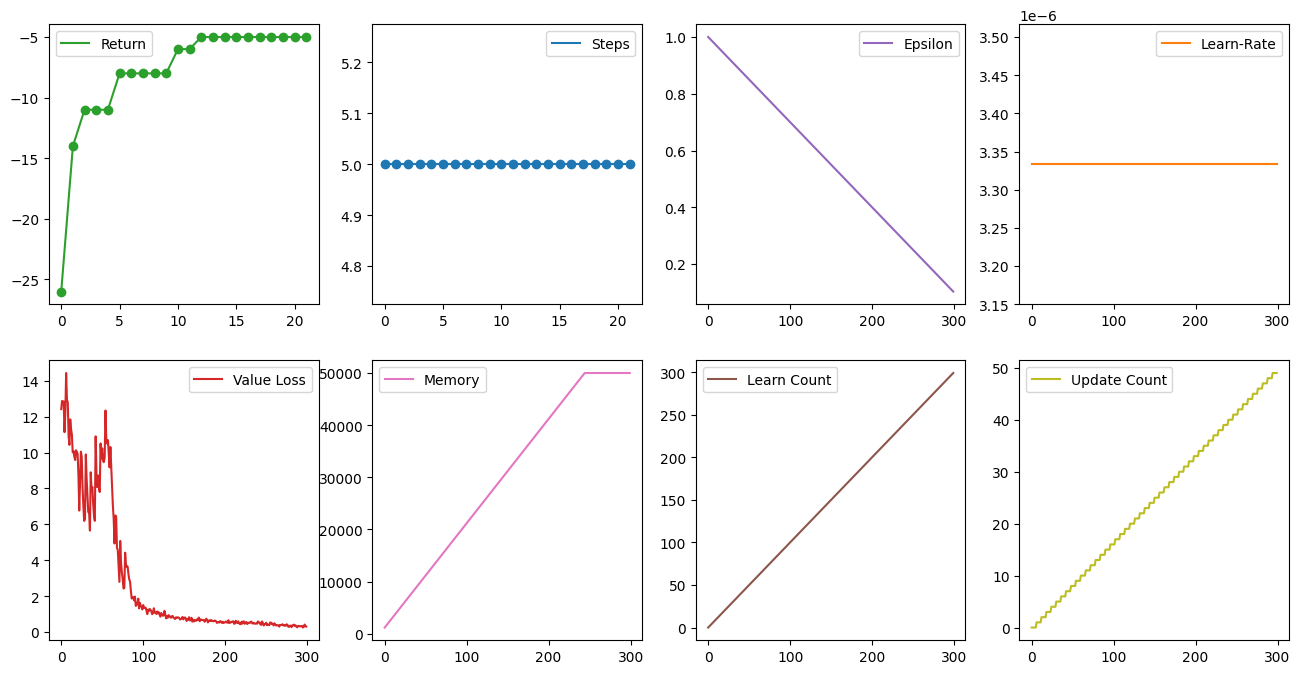

In [14]:

_=DQN.load_plot_training_result('___archive___\\s2sDQN\\results.npz')

In [15]:
@staticmethod
def load_plot_training_result(path):
    res = np.load(path)
    fig = plot_training_result(res['val'], res['train'], res['count'])
    res.close()
    return fig


@staticmethod
def plot_training_result(validation_hist, train_hist, count_hist):
        tEpsilon, tLR, tLoss = train_hist[:, 0], train_hist[:, 1], train_hist[:, 2]
        vReturn, vSteps = validation_hist[:, 0], validation_hist[:, 1]
        cLearn, cUpdate, cMemory = count_hist[:, 0], count_hist[:, 1], count_hist[:, 2]

        fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=60)
        ax_return = ax
        ax_return.set_xlabel('n-th Validation')
        ax_return.set_ylabel('Validation Return')
        ax_return.grid(axis='both')
        ax_return.plot(vReturn, color='tab:green', label='Return')
        ax_return.scatter(np.arange(len(vReturn)), vReturn, color='tab:green')
        ax_return.legend()
        plt.show()

        fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=60)
        ax_loss = ax
        ax_loss.set_xlabel('n-th Epoch')
        ax_loss.set_ylabel('Value Loss')
        ax_loss.grid(axis='both')
        ax_loss.plot(tLoss, color='tab:red', label='Value Loss')
        ax_loss.legend()
        return fig


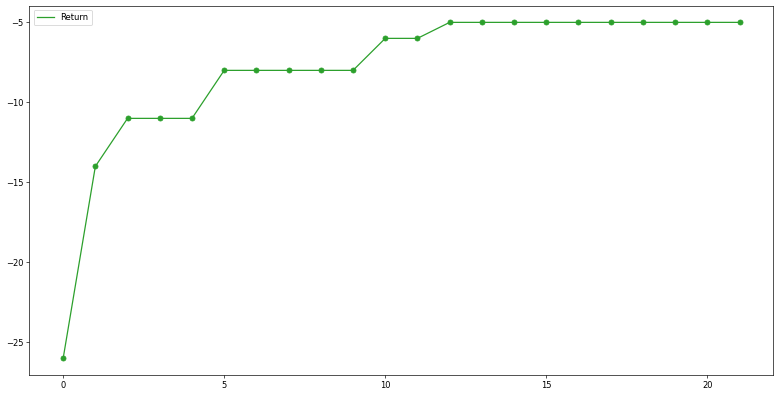

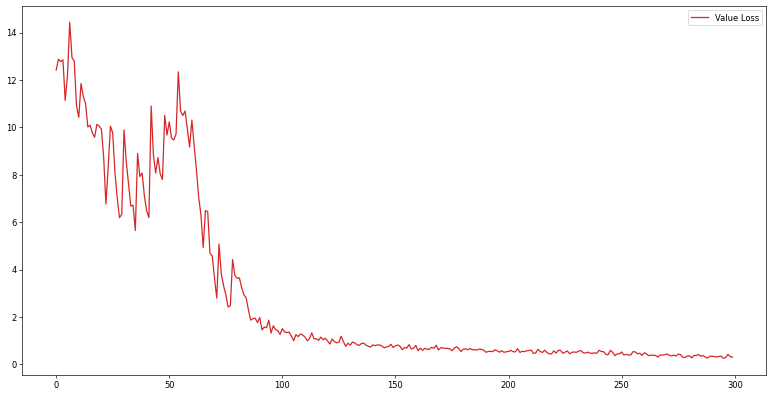

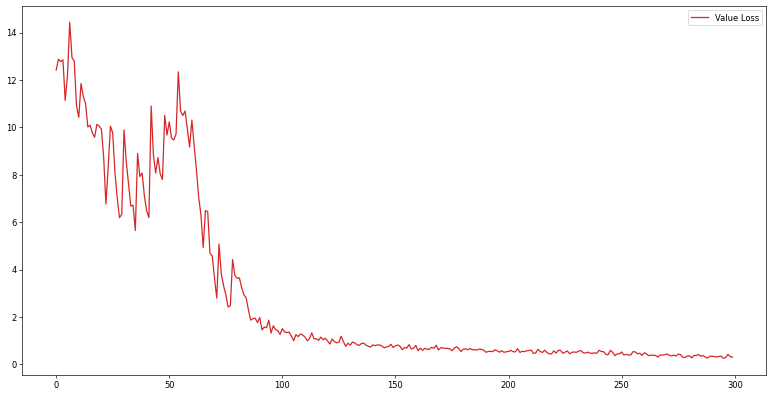

In [16]:

load_plot_training_result('___archive___\\s2sDQN\\results.npz')

In [2]:


def tenvF(): return maco.WorkersEnv.get(duration=48, n_workers=4, n_states=5, rng_seed=10293874756, max_time_ratio=1.0)
def venvF(): return maco.WorkersEnv.get(duration=48, n_workers=4, n_states=5, rng_seed=10293874756, max_time_ratio=1.0).freeze(0)
def venvsF(): return [ maco.WorkersEnv.get(duration=48, n_workers=4, n_states=5, rng_seed=10293874756, max_time_ratio=1.0).freeze(f) for f in range(5)]

env = tenvF()
def pieF(**factory): return deep.rl.S2SDQN(
    n_actions = env.A,
    embed_dim = 64,

    encoder_block_size = env.T,
    encoder_vocab_count = env.task_vocab.count,
    encoder_hidden_dim = 128,
    encoder_activation = nn.GELU(),
    encoder_num_heads = 4,
    encoder_num_layers = 1,
    encoder_norm_eps = 0.0, # final norm # keep zero to not use norm
    encoder_dropout = 0.0,
    encoder_norm_first = True,

    decoder_block_size = env.T,
    decoder_vocab_count = env.worker_vocab.count,
    decoder_hidden_dim = 128,
    decoder_activation = nn.GELU(),
    decoder_num_heads = 4,
    decoder_num_layers = 6,
    decoder_norm_eps = 0.0, # final norm # keep zero to not use norm
    decoder_dropout = 0.0,
    decoder_norm_first = True,

    dense_layer_dims = [128 ,128, 128],
    dense_actFs = [nn.Tanh(), nn.ReLU() ],
    dense_bias = True,

    xavier_init = False,

    has_target = True, 
    **factory)


In [3]:
pie = pieF(**factory)
deep.modular.count(pie.theta)

383876

In [4]:
pie.load('s2sDQN/200.pie')

In [5]:

test_pies = {
    'random'    : deep.rl.RIE(0, env.A),
    'dqn'       : pie,
}

In [8]:
venvs = venvsF()

In [9]:
for k,v in test_pies.items():
    mean_return, mean_steps, sum_return, sum_steps, acts=deep.rl.Eval.validate_policy(
        envs=venvs,
        pie=v,
        episodes = 5,
        verbose_result=False,
    )
    print(f'{k}\n\t{mean_return=}\n\t{mean_steps=}\n\t{sum_return=}\n\t{sum_steps=}\t\n{len(acts)=}')

random
	mean_return=-12.0104
	mean_steps=48.0
	sum_return=-60.05200000000001
	sum_steps=240.0	
len(acts)=5
dqn
	mean_return=-6.6042000000000005
	mean_steps=48.0
	sum_return=-33.021
	sum_steps=240.0	
len(acts)=5


In [10]:
for k,v in test_pies.items():
    mean_return, mean_steps, sum_return, sum_steps, acts=deep.rl.Eval.validate_policy_once(
        envs=venvs,
        pie=v,
        episodic_verbose=False,
    )
    print(f'{k}\n\t{mean_return=}\n\t{mean_steps=}\n\t{sum_return=}\n\t{sum_steps=}\t\n{len(acts)=}\n{acts=}')

random
	mean_return=-11.115800000000002
	mean_steps=48.0
	sum_return=-55.57900000000001
	sum_steps=240.0	
len(acts)=5
acts=[[3, 3, 2, 2, 2, 1, 0, 2, 3, 0, 0, 0, 1, 1, 3, 3, 0, 3, 3, 3, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 3, 3, 1, 0, 0, 2, 1, 3, 2, 3, 0, 1, 0, 3, 3, 1, 3, 2], [3, 3, 0, 0, 2, 2, 1, 2, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 1, 1, 1, 3, 3, 0, 3, 2, 2, 3, 1, 1, 0, 1, 1, 0, 0, 3, 1, 3], [1, 3, 3, 2, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 0, 1, 2, 2, 0, 1, 3, 2, 3, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 1, 1, 3, 3, 0, 3], [2, 2, 1, 3, 0, 1, 0, 1, 1, 3, 1, 0, 0, 0, 1, 3, 2, 2, 3, 3, 0, 3, 2, 0, 0, 3, 1, 3, 1, 2, 0, 2, 2, 1, 0, 3, 1, 0, 2, 0, 3, 0, 1, 3, 3, 3, 2, 0], [2, 2, 1, 3, 0, 1, 1, 3, 3, 0, 3, 0, 0, 3, 0, 2, 3, 3, 2, 0, 3, 1, 0, 3, 0, 3, 1, 2, 3, 2, 2, 1, 0, 3, 3, 3, 2, 3, 0, 3, 1, 0, 0, 3, 3, 2, 2, 1]]
dqn
	mean_return=-6.6042000000000005
	mean_steps=48.0
	sum_return=-33.021
	sum_steps=240.0	
len(acts)=5
acts=[[3, 0, 0, 3, 3, 2, 1, 0, 3, 0, 0, 3,

In [ ]:
from maco import fda

n_actions = env.A
n_steps =   env.T


#====================================================================================================
#====================================================================================================

def randflowF(): return fda.random_flow(0, n_actions+1, n_steps)
def flow2sol(x): return [ int(abs(i)) % n_actions for i in x ]
def flowcost(x): return deep.rl.Eval.test_cost(env,  flow2sol(x))

#====================================================================================================
#====================================================================================================


#print(f'{placement=}')
top_flows =[(np.zeros(n_steps) + j) for j in range(0, n_actions)] 
   
Flow_X, Flow_fitness  = \
fda.optimize(   MAXITER=    1000,
                randflowF=  randflowF,
                costF=      flowcost,
                beta=       5,
                alpha=      5,
                base_flows= top_flows,
                seed=       None)

# for i,(fx, fi) in enumerate(zip(Flow_X, Flow_fitness)):
#     print(f'{i=} : {flow2sol(fx)=} : {fi=}')

# select top flows to continue
selected_flows=[]
selected_fitness = []
for flow,fcost in zip(Flow_X, Flow_fitness):
    sol = flow2sol(flow)
    if sol not in selected_flows: 
        selected_flows.append(sol)
        selected_fitness.append(fcost)
selected_n = len(selected_flows)

sorted_cost = np.argsort(selected_fitness)
top_flows = [(np.array(selected_flows[sorted_cost[top]]), selected_fitness[sorted_cost[top]]) for top in range(selected_n)]
#top_costs = [selected_fitness[sorted_cost[top]] for top in range(min(n_top, selected_n))]

print(f'\nSORTED')
for i,(fx, fi) in enumerate(top_flows):
    print(f'{i=} : {fx=} : {fi=}')
    



t=0


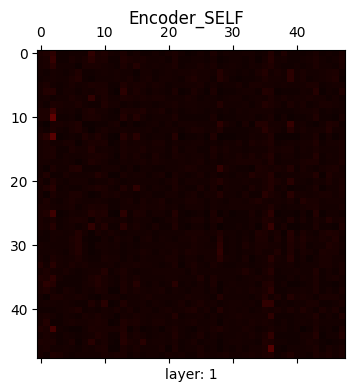

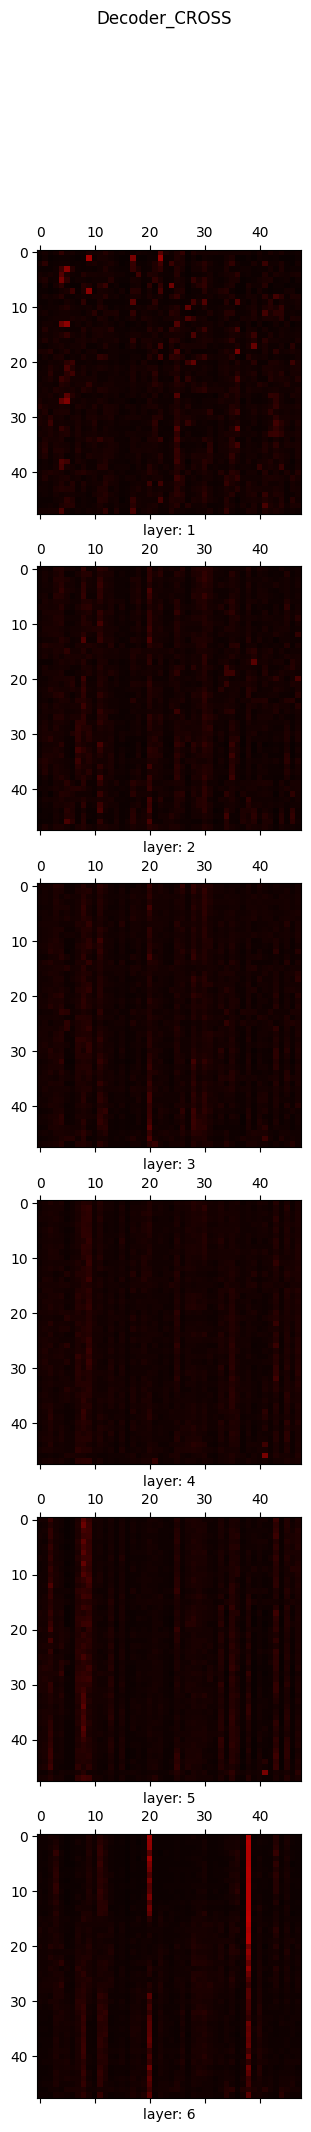

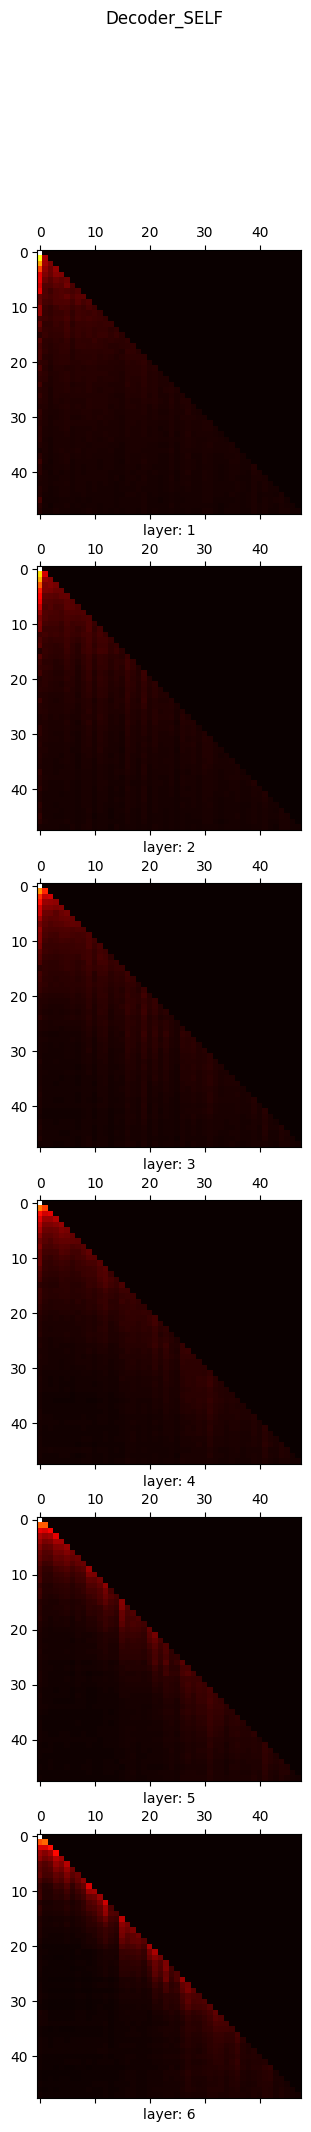

a_=tensor([3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3],
       device='cuda:0'), a=3, t=1, d=False, r=-0.034

t=1


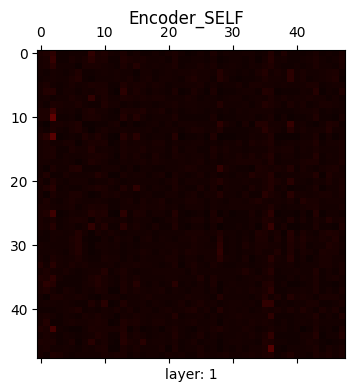

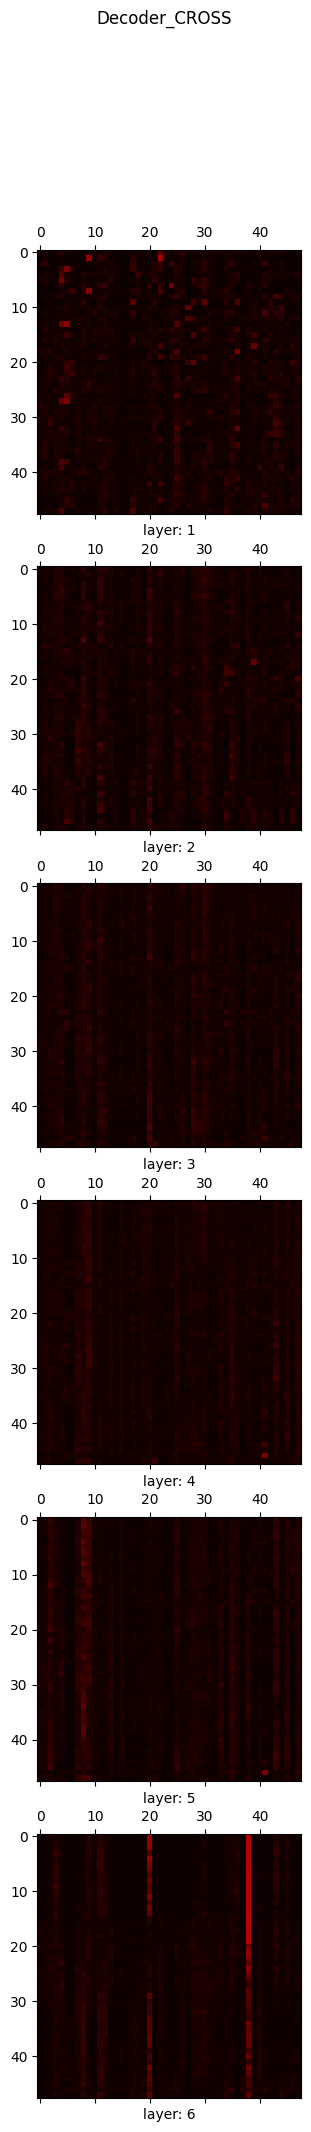

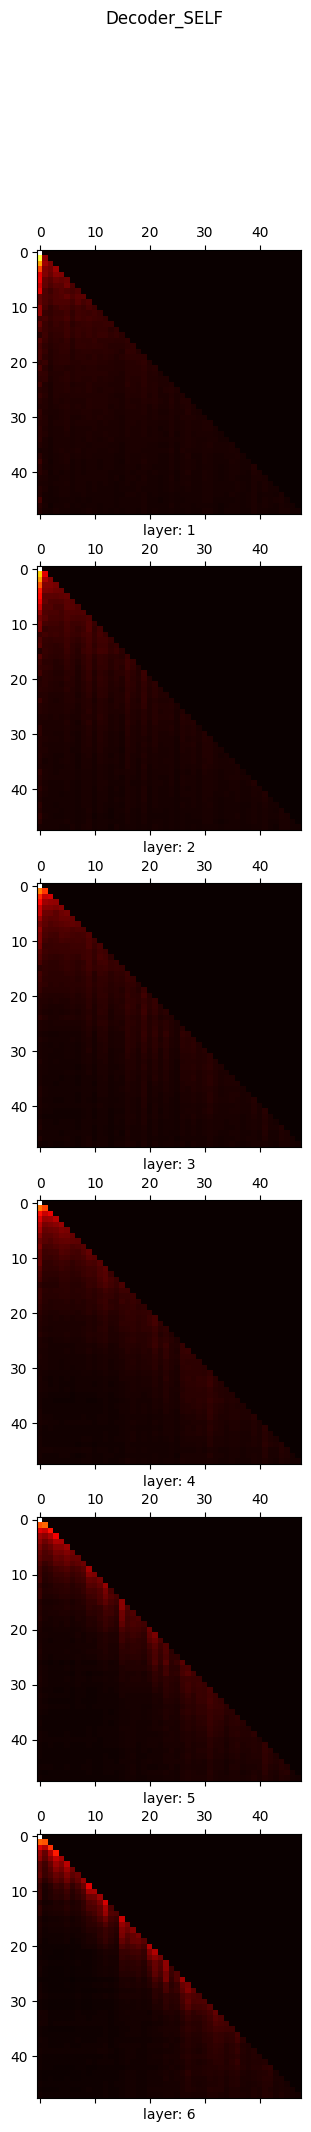

a_=tensor([3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3],
       device='cuda:0'), a=0, t=2, d=False, r=-0.033

t=2


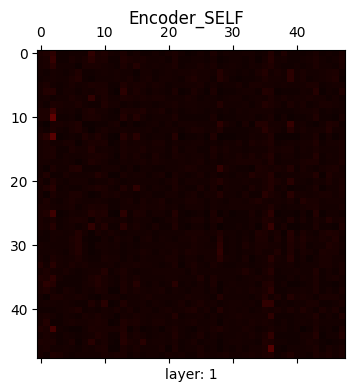

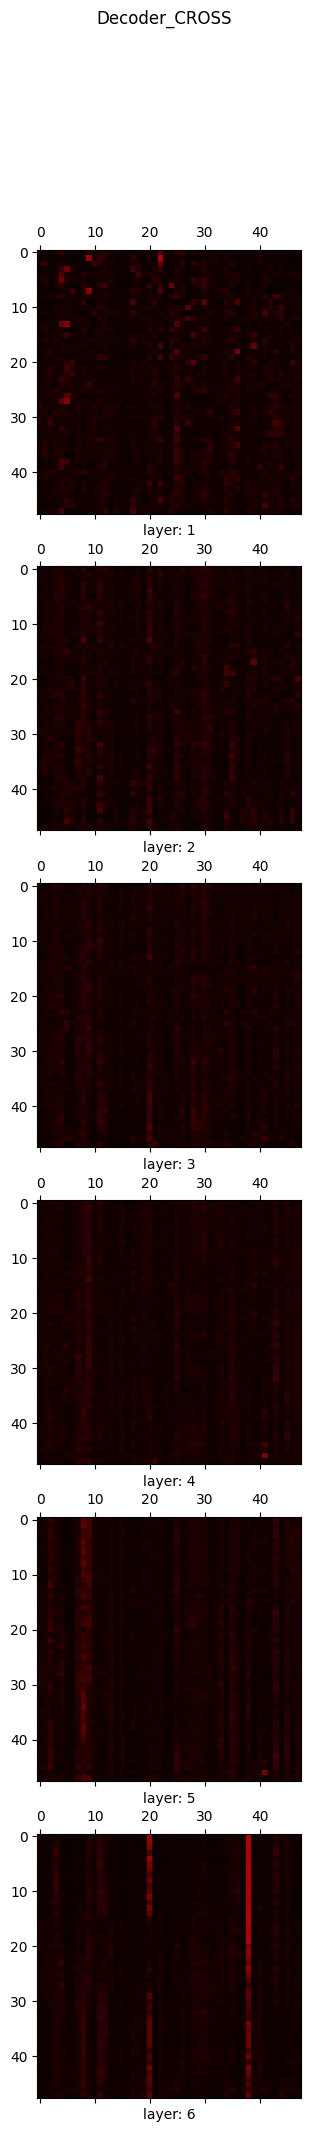

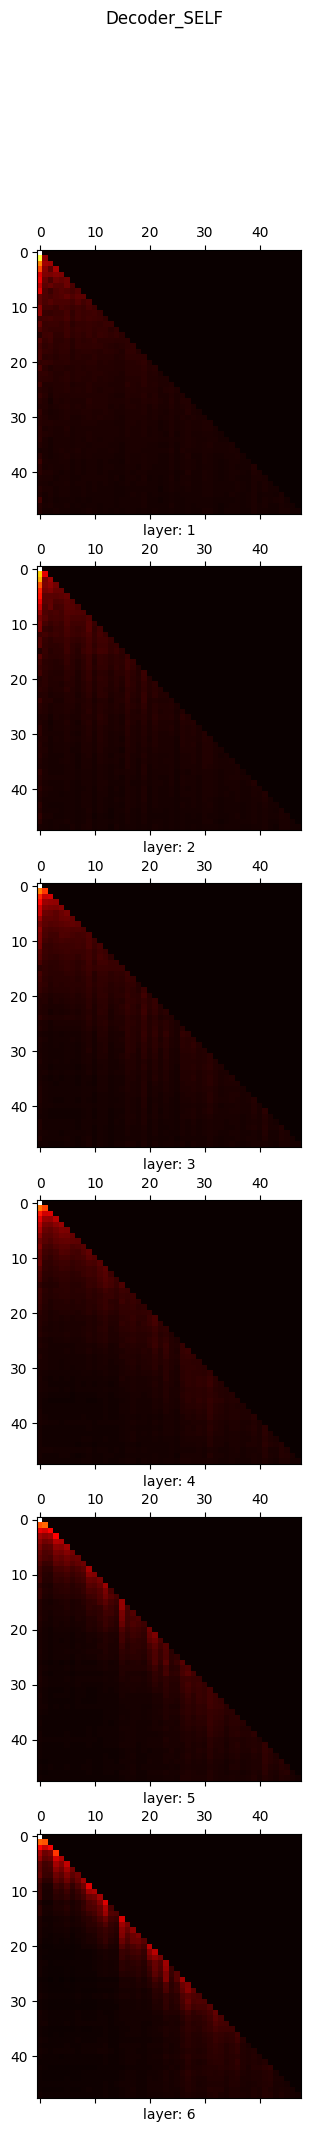

a_=tensor([3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0],
       device='cuda:0'), a=0, t=3, d=False, r=-0.032

t=3


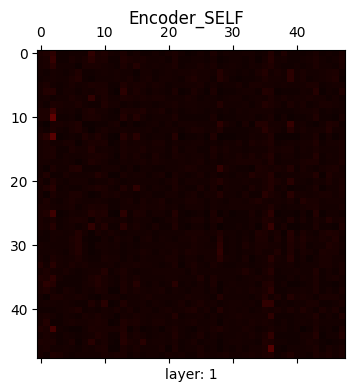

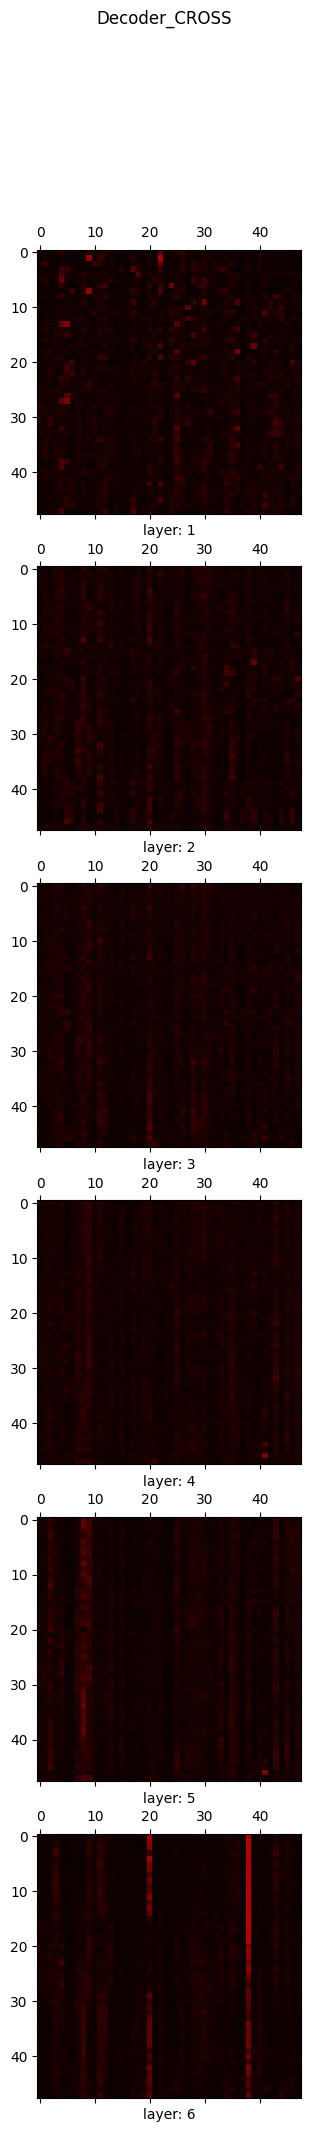

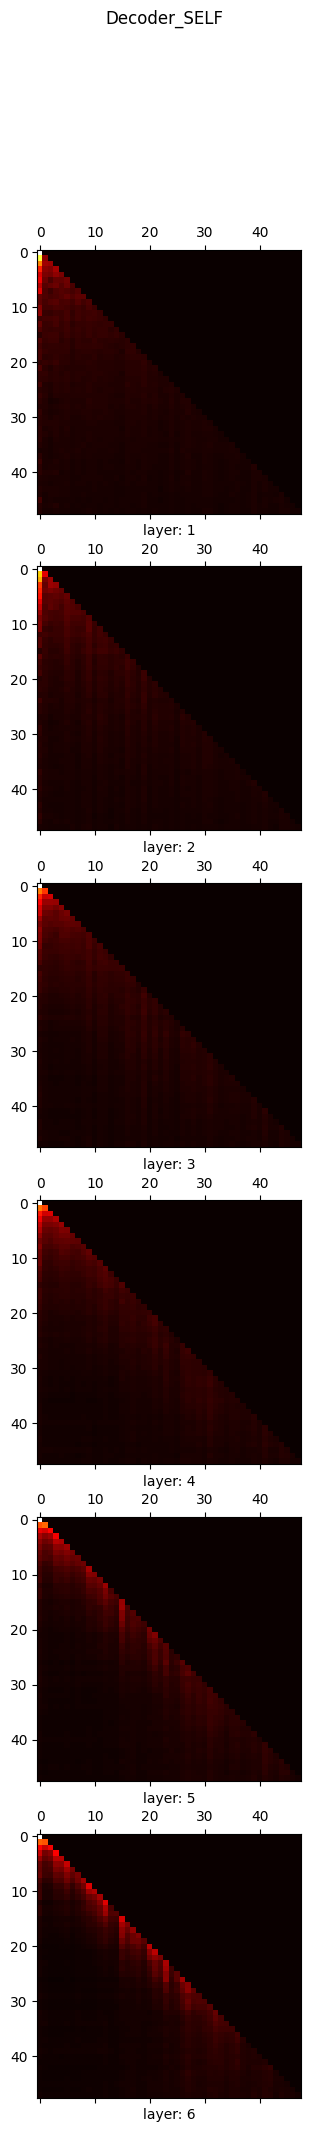

a_=tensor([3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0],
       device='cuda:0'), a=3, t=4, d=False, r=-0.032

t=4


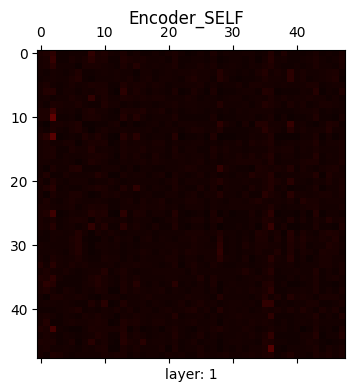

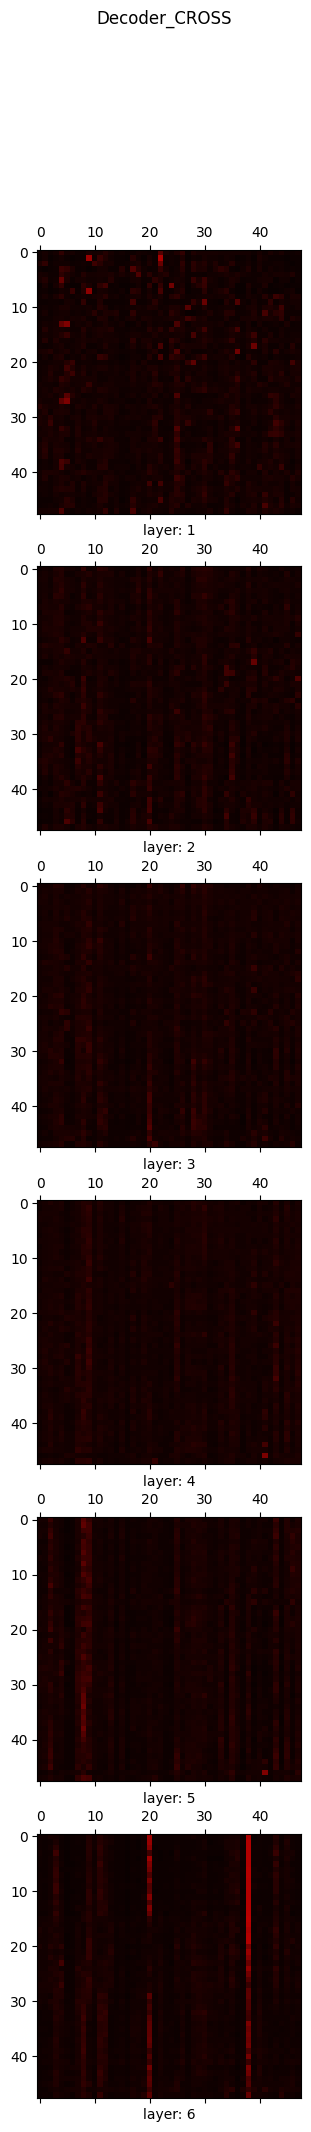

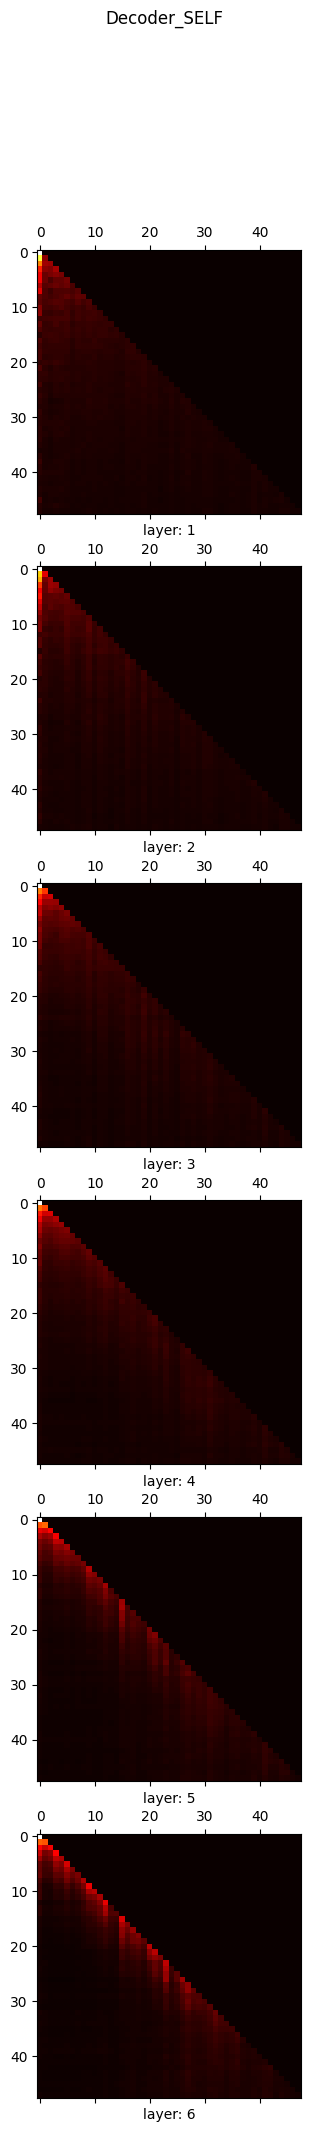

a_=tensor([3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0],
       device='cuda:0'), a=3, t=5, d=False, r=-0.032

Return = -0.163
Actions = [3, 0, 0, 3, 3]


In [12]:
view_attention = 1
max_steps = 5

decoder_sa = dict(width=4, values=False, ticks=False, verbose=0, title='Decoder_SELF',  cmap='hot', vmin=0, vmax=1)
decoder_ca = dict(width=4, values=False, ticks=False, verbose=0, title='Decoder_CROSS',  cmap='hot', vmin=0, vmax=1)
encoder_sa = dict(width=4, values=False, ticks=False, verbose=0, title='Encoder_SELF',  cmap='hot', vmin=0, vmax=1)

pie.eval()
if view_attention: pie.theta.do_store_attention(True)

s, t, d= env.reset()
cr = 0.0
ah = []
if max_steps<=0: max_steps=tt.inf
while not (d or max_steps<=t):
    print(f'\n{t=}')
    _, a_, a = pie.predict_(s, t)
    if view_attention: 
        #pie.theta.decoder.view_in_attention(**decoder_sa)
        pie.theta.encoder.view_attention(**encoder_sa)
        pie.theta.decoder.view_attention(cross=True, **decoder_ca)
        pie.theta.decoder.view_attention(cross=False, **decoder_sa)
        
    s, t, d, r = env.step(a)
    print(f'{a_=}, {a=}, {t=}, {d=}, {r=}')
    
    cr+=r
    ah.append(a)

print('')
print(f'Return = {cr}')
print(f'Actions = {ah}')

if view_attention: pie.theta.do_store_attention(False)

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 
'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 
'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'winter', 'winter_r'